In [42]:
### Benjamin Tollison ###
import sympy as sp
from IPython.display import display, Math, Latex
from sympy.solvers.solveset import linsolve
from sympy.solvers.pde import pdsolve
from sympy import  lambdify, Matrix,sin,cos, sinh, cosh, exp, pi, symbols, integrate, Function, Eq
import numpy as np
import matplotlib.pyplot as plt
import scipy
def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
    np.set_printoptions(suppress=True)

In [43]:
# Problem 1a
r1 = np.array([-6755.6,6411.11,-5585.66])
v1 = np.array([-3.74170,5.63902,-0.972395])
earth_gravitational_parameter = 3.986004354360959*10**5
r1_magnitude = np.linalg.norm(r1)
v1_magnitude = np.linalg.norm(v1)
h = np.cross(r1,v1)
e = np.cross(v1,h)/earth_gravitational_parameter - r1/r1_magnitude
specific_mechanical_energy = v1_magnitude**2/2 - earth_gravitational_parameter/r1_magnitude
e_magnitude = np.linalg.norm(e)
a = -earth_gravitational_parameter/(2*specific_mechanical_energy)
p = a*(1-e_magnitude**2)
p_hat = np.cross(h,e) / p
orbit_period = ((2*np.pi)/np.sqrt(earth_gravitational_parameter))*a**(3/2)
h_symbol,e_symbol,specific_mechanical_energy_symbol, a_symbol = symbols('\\vec{h} \\vec{e} \\xi a')
displayEquations(h_symbol,h)
displayEquations(e_symbol,e)
displayEquations('e',e_magnitude)
displayEquations(a_symbol,a)
displayEquations('p',p)
displayEquations(specific_mechanical_energy_symbol,specific_mechanical_energy)
displayEquations('TP',orbit_period)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

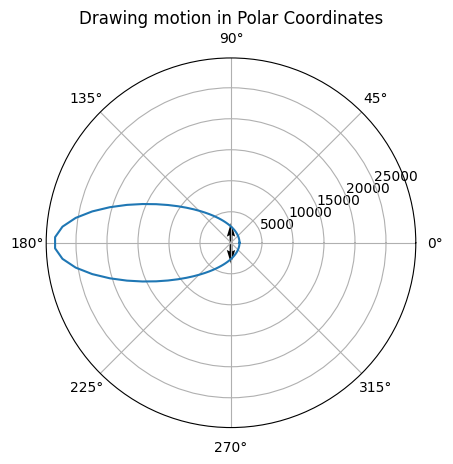

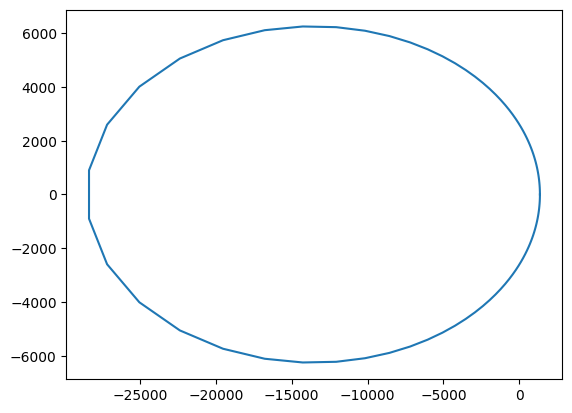

In [44]:
nu_values = np.linspace(0,2*np.pi,100)
r_polar_cooridnates = lambda nu: p / (1 + e_magnitude*np.cos(nu))
x_catessian = lambda nu: (p*np.cos(nu)) / (1+e_magnitude*np.cos(nu))
y_catessian = lambda nu: (p*np.sin(nu)) / (1+e_magnitude*np.cos(nu))
plt.polar(nu_values,r_polar_cooridnates(nu_values))
plt.title('Drawing motion in Polar Coordinates')
plt.quiver([0,0],r1[:2])
plt.show()
plt.plot(x_catessian(nu_values),y_catessian(nu_values),label='Motion with Polar transfermation')
plt.show()

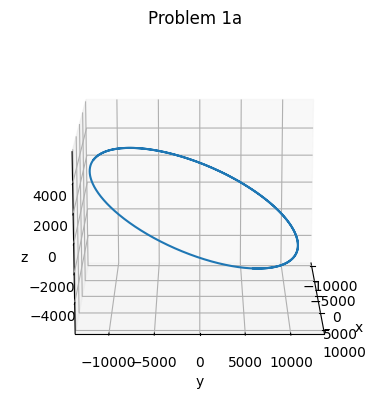

In [45]:
# equation of motion
delta_t = 0.1
time = np.arange(0,orbit_period,delta_t)
def getOrbitArrayForEachCartessianAxis(position_vector, velocity_vector):
  # input 2 3x1 arrays
  # output 1 3xn array
  three_by_time_array = np.zeros((3,len(time)))
  for axis in range(len(position_vector)):
    x_values = np.zeros((len(time),2))
    x_values[0,0] = position_vector[axis]
    x_values[0,1] = velocity_vector[axis]
    for i, t in enumerate(time[:-1]):
      determinant = 1 + earth_gravitational_parameter/r1_magnitude**3 * delta_t**2
      x_values[i+1,0] = (x_values[i,0] + x_values[i,1]*delta_t) / determinant
      x_values[i+1,1] = (x_values[i,1] - x_values[i,0]*earth_gravitational_parameter/r1_magnitude**3*delta_t) / determinant
    three_by_time_array[axis,:] = x_values[:,0]
  return three_by_time_array
orbit_plot = plt.figure().add_subplot(projection='3d')
x,y,z = getOrbitArrayForEachCartessianAxis(r1,v1)[0], getOrbitArrayForEachCartessianAxis(r1,v1)[1],getOrbitArrayForEachCartessianAxis(r1,v1)[2]
orbit_plot.plot(x,y,z, label='1a')
orbit_plot.set_xlabel('x')
orbit_plot.set_ylabel('y')
orbit_plot.set_zlabel('z')
plt.title('Problem 1a')
# plt.show()
orbit_plot.view_init(15,0,0)

(881, 3)


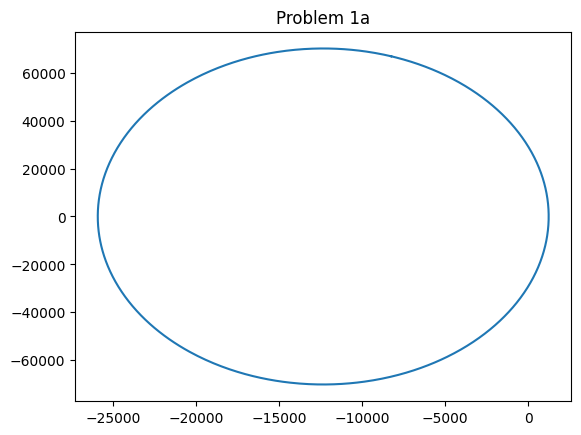

In [46]:
x1 = np.zeros(6)
for i in range(3):
    x1[i] = r1[i]
    x1[i+3] = v1[i]
x = np.zeros(6)
def Orbit_ODE(time:float(),x_vector,gravitational_parameter:float(),dummy_variable):
  dot_r = x_vector[3:6]
  dot_v = (-gravitational_parameter/(np.linalg.norm(x_vector[0:3])**3)) * x_vector[0:3]
  dot_x = np.hstack((dot_r,dot_v))
  return dot_x
Solution = scipy.integrate.solve_ivp(Orbit_ODE,(0,orbit_period),x1,method='RK45',args=(earth_gravitational_parameter,2),rtol=1e-12,atol=1e-12)

# corrected_orbit_plot = plt.figure().add_subplot(projection='3d')
x,y,z = Solution.y[0], Solution.y[1], Solution.y[2]
x_p,y_p,z_p = np.zeros(len(x)), np.zeros(len(x)), np.zeros(len(x))
x,y,z = Solution.y[0],Solution.y[1],Solution.y[2]
r_vector=np.zeros((len(x),3))
for i in range(len(x)):
  r_vector[i] = np.array([x[i],y[i],z[i]])
print(np.shape(r_vector))
x_p = r_vector.dot(e)
y_p = r_vector.dot(p_hat)
z_p = 0
# corrected_orbit_plot.plot(x_p,y_p,z_p, label='1a')
# corrected_orbit_plot.set_xlabel('x')
# corrected_orbit_plot.set_ylabel('y')
# corrected_orbit_plot.set_zlabel('z')
plt.title('Problem 1a')
plt.plot(x_p,y_p)
# corrected_orbit_plot.view_init(90,0,0)

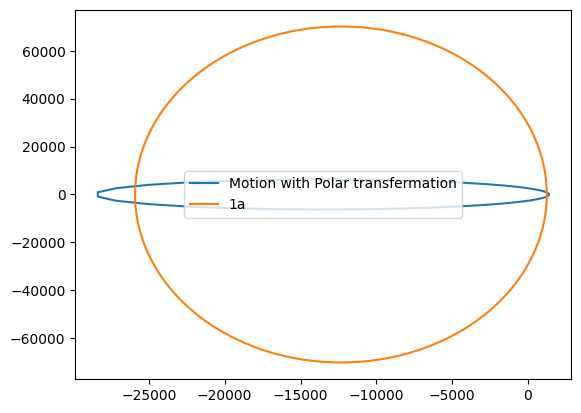

In [47]:
plt.plot(x_catessian(nu_values),y_catessian(nu_values),label='Motion with Polar transfermation')
plt.plot(x_p,y_p, label='1a')
plt.legend()
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

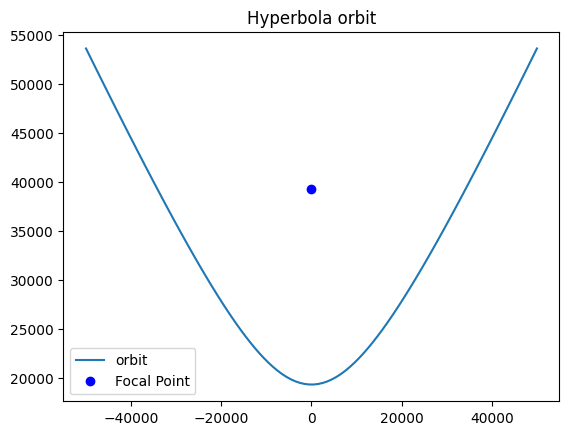

In [48]:
# Problem 1b
r2 = np.array([-10618.9,5106.13,-16902.2])
v2 = np.array([-4.03295,-6.04142,2.56842])
earth_gravitational_parameter = 3.986004354360959*10**5
r2_magnitude = np.linalg.norm(r2)
v2_magnitude = np.linalg.norm(v2)
h = np.cross(r2,v2)
e = np.cross(v2,h)/earth_gravitational_parameter - r2/r2_magnitude
specific_mechanical_energy = v2_magnitude**2/2 - earth_gravitational_parameter/r2_magnitude
e_magnitude = np.linalg.norm(e)
a = -earth_gravitational_parameter/(2*specific_mechanical_energy)
p = a*(1-e_magnitude**2)
p_hat = np.cross(h,e) / p
# orbit_period = ((2*np.pi)/np.sqrt(earth_gravitational_parameter))*a**(3/2)
h_symbol,e_symbol,specific_mechanical_energy_symbol, a_symbol = symbols('\\vec{h} \\vec{e} \\xi a')
displayEquations(h_symbol,h)
displayEquations(e_symbol,e)
displayEquations('e',e_magnitude)
displayEquations(a_symbol,a)
displayEquations('p',p)
displayEquations(specific_mechanical_energy_symbol,specific_mechanical_energy)
displayEquations('TP','Undefined')
b = np.linspace(-50000,50000,100)
c = lambda x,y: np.sqrt(x**2 + y**2)
plt.plot(b,c(a,b),label='orbit')
plt.plot(0,c(a,0)+ a*(1-e_magnitude),'bo',label="Focal Point")
plt.title('Hyperbola orbit')
plt.legend()
plt.show()

(57, 3)


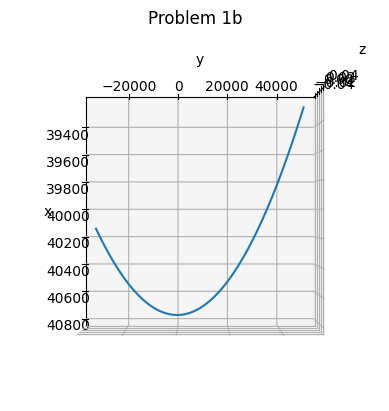

In [49]:

hyperbola_orbit_plot = plt.figure().add_subplot(projection='3d')
time = b
x2 = np.zeros(6)
for i in range(3):
  x2[i] = r2[i]
  x2[i+3] = v2[i]
Solution = scipy.integrate.solve_ivp(Orbit_ODE,(-1e3,1e3),x2,method='RK45',args=(earth_gravitational_parameter,2),rtol=1e-12,atol=1e-12)
x_p,y_p,z_p = np.zeros(len(x)), np.zeros(len(x)), np.zeros(len(x))
x,y,z = Solution.y[0],Solution.y[1],Solution.y[2]
r_vector=np.zeros((57,3))
for i in range(len(x)):
  r_vector[i] = np.array([x[i],y[i],z[i]])
print(np.shape(r_vector))
x_p = r_vector.dot(e)
y_p = r_vector.dot(p_hat)
z_p = 0
hyperbola_orbit_plot.plot(x_p,y_p,z_p, label='1a')
hyperbola_orbit_plot.set_xlabel('x')
hyperbola_orbit_plot.set_ylabel('y')
hyperbola_orbit_plot.set_zlabel('z')
hyperbola_orbit_plot.view_init(60)
plt.title('Problem 1b')
hyperbola_orbit_plot.view_init(90,0,0)